Simple Optimization (Discrete) - Bolt Selection

We need to pick a bolt from a standard list that can support $70,000\text{ N}$ without exceeding a yield strength of $640\text{ MPa}$.

In [1]:
# !pip install pygad
import pygad
import numpy as np
import matplotlib.pyplot as plt

# 1. Our "Catalog" of standard bolt diameters (mm)
standard_bolts = [5, 6, 8, 10, 12, 14, 16, 20, 24, 30, 36]
LOAD = 70000  # Newtons
MAX_STRESS = 640  # MPa (N/mm^2)

# 2. Fitness Function: How 'good' is a specific bolt?
def fitness_func(ga_instance, solution, solution_idx):
    # 'solution' is an index in our standard_bolts list
    index = int(solution[0])
    d = standard_bolts[index]

    # Calculate Stress
    area = np.pi * (d/2)**2
    stress = LOAD / area

    # CONSTRAINT: If it breaks, it's a terrible design (fitness = 0)
    if stress > MAX_STRESS:
        return 0

    # OBJECTIVE: Minimize diameter (which is like maximizing 1/diameter)
    return 1.0 / d

# 3. Setup the GA
ga_instance = pygad.GA(num_generations=50,
                       num_parents_mating=2,
                       fitness_func=fitness_func,
                       sol_per_pop=10,
                       num_genes=1,
                       # Tell GA the "gene" is an index between 0 and len(catalog)-1
                       gene_space={'low': 0, 'high': len(standard_bolts)-1},
                       gene_type=int)

ga_instance.run()

# 4. Results
solution, solution_fitness, solution_idx = ga_instance.best_solution()
best_bolt = standard_bolts[int(solution[0])]
print(f"The lightest standard bolt that works is: M{best_bolt}")

The lightest standard bolt that works is: M12


c:\Users\Lenovo\miniconda3\envs\312\Lib\site-packages\pygad\pygad.py:733: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(


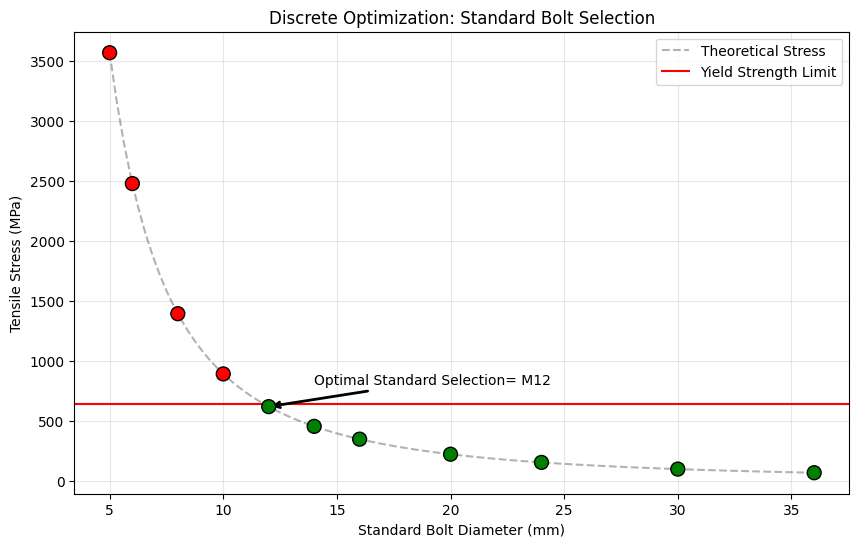

In [3]:
# Data for plotting
diameters = np.array(standard_bolts)
stresses = LOAD / (np.pi * (diameters/2)**2)

plt.figure(figsize=(10, 6))

# Plot the physics (the smooth curve)
fine_d = np.linspace(5, 36, 100)
plt.plot(fine_d, LOAD / (np.pi * (fine_d/2)**2), 'k--', alpha=0.3, label='Theoretical Stress')

# Plot our actual options (The Discrete Dots)
colors = ['red' if s > MAX_STRESS else 'green' for s in stresses]
plt.scatter(diameters, stresses, c=colors, s=100, edgecolors='black', zorder=5)

# Constraint Line
plt.axhline(y=MAX_STRESS, color='r', linestyle='-', label='Yield Strength Limit')

# Highlight the Winner
plt.annotate(f'Optimal Standard Selection= M{best_bolt}', xy=(best_bolt, LOAD/(np.pi*(best_bolt/2)**2)),
             xytext=(best_bolt+2, 800), arrowprops=dict(arrowstyle='->', lw=2))

plt.title('Discrete Optimization: Standard Bolt Selection')
plt.xlabel('Standard Bolt Diameter (mm)')
plt.ylabel('Tensile Stress (MPa)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()